<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P5_02_notebookTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5

[Errno 2] No such file or directory: 'drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5'
/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy

from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc


from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
import pyLDAvis.gensim_models as gensimvis

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
nltk.download('stopwords')
!python -m spacy download en_core_web_sm

In [ ]:
pip install pyLDAvis

In [ ]:
df = pad.read_csv('data_projet5_clean.csv', sep='\t')

In [ ]:
df

,Unnamed: 0,Body,Tags,Title,Title_Clean,Body_Clean,Tags_Clean
0,0,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,How to convert a Decimal to a Double in C#?,convert decimal double c #,want use < code > track-bar < /code > change <...,c# floating-point type-conversion double deci...
1,1,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,Why did the width collapse in the percentage w...,width collapse percentage width child element ...,absolutely positioned < code > div < /code > c...,html css internet-explorer-7
2,2,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,How do I calculate someone's age based on a Da...,calculate someone age based datetime type birt...,given < code > datetime < /code > representing...,c# .net datetime
3,3,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#,calculate relative time c #,given specific < code > datetime < /code > val...,c# datetime time datediff relative-time-span
4,4,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,Determine a user's timezone,determine user timezon,standard web server able determine user timezo...,html browser timezone user-agent timezone-off...
...,...,...,...,...,...,...,...
49752,49995,<p>For a long time now C++ has been the domina...,<c#><mono><xna>,Viability of C#/.NET as the new standard game ...,viability c # /.net new standard game dev plat...,for long time c++ dominate game development la...,c# mono xna
49753,49996,<p>I have a NavigationWindow which hosts a ser...,<wpf><animation><navigationwindow>,Is it possible to have an animation appear on ...,possible animation appear wpf navigationwindow,navigationwindow hosts series pages . for desi...,wpf animation navigationwindow
49754,49997,<p>I'm sure there's a simple explanation for t...,<apache-flex><flexbuilder>,Deploying Flex Projects Leveraging Imported We...,deploying flex projects leveraging imported we...,'m sure simple explanation n't much luck findi...,apache-flex flexbuilder
49755,49998,<p>I need a way to compute the nth root of a l...,<python><math><nth-root>,How to compute the nth root of a very big integer,compute nth root big integ,need compute nth root long integer python . < ...,python math nth-root


# Modèle non-supervisé

## GENSIM

Préparation du corpus

In [ ]:
df_GENSIM = df.sample(n=1000, random_state=7)

In [ ]:
df_GENSIM["Title_and_Body_Clean"] = df['Title_Clean'] + df['Body_Clean']

In [ ]:
data_words = df_GENSIM["Title_and_Body_Clean"].values.tolist()

In [ ]:
data_words

["localization sharpdevelop'm working localized application develop sharpdevelop . based < href= http //www.devhood.com/tutorials/tutorial_details.aspx tutorial_id=211 rel= nofollow noreferrer > tutorial < /a > ran error < /p > < blockquote > could find resources appropriate specified culture neutral culture disk . basename < /p > < /blockquote > created ressource file using project | add | new item respective empty ressource file could n't find assembly resource file . furthermore 've set build action embeddedresource . < /p > within program class following < /p > < pre > < code > // load resource file resourcemanager = resourcemanager.createfilebasedresourcemanager file filepath null ; // depending user selection set cultureinfo code behind form i.e . thread.currentthread.currentuiculture = locales [ 0 ] ; // contains en // method class used lookup values public string getvalue string key { return resourcemanager.getstring key ; } < /code > < /pre > sharpdevelop 3.0.0.3437 .net versi

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [ ]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 6), (28, 3), (29, 1)]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, random_state=7, chunksize=100, passes=10, per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.052*"strong" + 0.041*"code" + 0.037*"pre" + 0.019*"test" + 0.019*"class" '
  '+ 0.016*"would" + 0.014*"question" + 0.012*"name" + 0.011*"com" + '
  '0.009*"unit"'),
 (1,
  '0.021*"database" + 0.020*"table" + 0.019*"would" + 0.019*"use" + '
  '0.018*"object" + 0.013*"file" + 0.012*"create" + 0.012*"server" + '
  '0.012*"type" + 0.010*"name"'),
 (2,
  '0.019*"web" + 0.015*"work" + 0.014*"application" + 0.013*"service" + '
  '0.012*"environment" + 0.011*"server" + 0.010*"user" + 0.010*"thing" + '
  '0.009*"net" + 0.009*"window"'),
 (3,
  '0.024*"page" + 0.022*"file" + 0.019*"would" + 0.018*"use" + 0.017*"site" + '
  '0.014*"control" + 0.012*"image" + 0.012*"net" + 0.011*"visual" + '
  '0.011*"studio"'),
 (4,
  '0.074*"pre" + 0.057*"code" + 0.033*"value" + 0.024*"string" + '
  '0.017*"return" + 0.014*"function" + 0.013*"select" + 0.011*"set" + '
  '0.009*"result" + 0.009*"would"'),
 (5,
  '0.039*"item" + 0.018*"process" + 0.014*"view" + 0.012*"state" + 0.009*"app" '
  '+ 0.008*"p

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.33472983560749664


In [ ]:
nb_of_topics = [1,10,20,50,70,100,200,300,400,800,1200,1500,2000]

In [ ]:
score = []
for n in nb_of_topics:
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=n, random_state=7, chunksize=100, passes=10, per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    score.append(coherence_lda)

In [ ]:
print(score)

In [ ]:
# le code précédent est très long (25min), donc je récupère les valeurs ci-dessous pour les avoir sans lancer le code à chaque fois
score = [0.3552740243429651, 0.32003819559051805, 0.3564470984198279, 0.35274432836805203, 0.36882855554926053, 0.359033465308935, 0.41017341168304017, 0.4376338122046004, 0.43826765387607053, 0.4475474670549366, 0.44013963907435555, 0.44016827569386985, 0.44017344556371574]

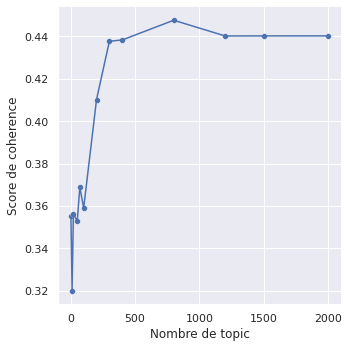

In [ ]:
sns.set_theme()
ax = sns.relplot(x=nb_of_topics, y=score, kind='line')
ax = sns.scatterplot(x=nb_of_topics, y=score)
ax.set_ylabel('Score de coherence')
ax.set_xlabel('Nombre de topic')
fig = ax.get_figure()
fig.savefig("Coherence score fonction nb topic", dpi=400)

Avec 400 topics on semble être assez représentatif de nos données

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=400, random_state=7, chunksize=100, passes=10, per_word_topics=True)

### Visualisation des topics :

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word, mds='mmds')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
220    0.141975  0.574344       1        1  4.523116
387   -0.525285  0.185064       2        1  1.132149
146    0.037193  0.539196       3        1  1.106064
235   -0.540300  0.119777       4        1  1.094801
183   -0.419613 -0.375089       5        1  1.069081
...         ...       ...     ...      ...       ...
181    0.009513 -0.018233     396        1  0.005336
184    0.009513 -0.018233     397        1  0.005336
191    0.009513 -0.018233     398        1  0.005336
194    0.009513 -0.018233     399        1  0.005336
200    0.009513 -0.018233     400        1  0.005336

[400 rows x 5 columns], topic_info=        Term         Freq        Total  Category  logprob  loglift
51       pre   928.000000   928.000000   Default  30.0000  30.0000
11      code  1000.000000  1000.000000   Default  29.0000  29.0000
331   strong   445.000000   445.000000   Default  28.0000  28.0000
27      file   409.000000   409.000000   Default  27.0000  27.0000
76     value   308.000000   308.000000   Default  26.0000  26.0000
..       ...          ...          ...       ...      ...      ...
25      even     0.000483   104.526295  Topic400  -8.6221  -2.4473
26   example     0.000483   202.319470  Topic400  -8.6221  -3.1077
27      file     0.000483   409.482923  Topic400  -8.6221  -3.8128
28      find     0.000483   264.495377  Topic400  -8.6221  -3.3757
29    follow     0.000483   139.937217  Topic400  -8.6221  -2.7391

[20645 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2398    140  0.836775       -PRON-
257     120  0.956660      ability
178      66  0.995699         able
945      68  0.717398     absolute
1678    217  0.909836  abstraction
...     ...       ...          ...
707      79  0.065687         year
707     117  0.065687         year
338      97  0.942747          yet
639     137  0.868454        yield
1799     76  0.849350         zone

[2903 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[221, 388, 147, 236, 184, 359, 155, 391, 35, 123, 265, 60, 164, 288, 372, 220, 333, 202, 92, 130, 99, 113, 281, 59, 215, 327, 293, 259, 23, 379, 40, 352, 22, 143, 253, 54, 208, 368, 296, 75, 70, 205, 180, 273, 299, 177, 342, 393, 239, 322, 320, 305, 96, 213, 186, 43, 222, 83, 27, 210, 386, 118, 346, 344, 247, 360, 197, 124, 271, 34, 84, 356, 104, 250, 49, 42, 301, 345, 18, 241, 38, 334, 46, 255, 343, 249, 335, 79, 107, 91, 86, 351, 183, 141, 37, 159, 232, 309, 196, 375, 162, 187, 82, 226, 329, 395, 251, 122, 95, 373, 62, 145, 399, 200, 355, 85, 400, 349, 252, 3, 234, 283, 228, 4, 173, 294, 353, 30, 90, 126, 230, 188, 307, 151, 67, 102, 71, 398, 189, 161, 191, 292, 225, 286, 384, 2, 199, 211, 133, 194, 248, 56, 246, 318, 171, 364, 149, 340, 229, 218, 377, 26, 332, 179, 298, 237, 378, 361, 392, 64, 266, 69, 146, 72, 244, 132, 14, 172, 214, 224, 68, 176, 51, 270, 11, 314, 389, 10, 8, 291, 381, 242, 308, 139, 206, 57, 302, 31, 311, 100, 204, 279, 168, 129, 170, 33, 53, 190, 116, 45, 111, 106, 156, 5, 350, 235, 264, 365, 371, 77, 193, 287, 114, 326, 216, 41, 315, 203, 231, 117, 47, 362, 370, 396, 300, 290, 369, 289, 347, 363, 295, 297, 394, 348, 285, 284, 397, 330, 303, 367, 328, 376, 354, 331, 325, 324, 323, 366, 321, 319, 380, 317, 374, 316, 382, 390, 313, 357, 312, 383, 336, 310, 338, 385, 358, 339, 341, 306, 387, 304, 337, 1, 282, 103, 76, 78, 80, 81, 87, 88, 89, 93, 94, 97, 98, 101, 105, 73, 108, 109, 110, 112, 115, 119, 120, 121, 125, 127, 128, 131, 74, 66, 280, 25, 6, 7, 9, 12, 13, 15, 16, 17, 19, 20, 21, 24, 28, 65, 29, 32, 36, 39, 44, 48, 50, 52, 55, 58, 61, 63, 134, 135, 136, 258, 217, 219, 223, 227, 233, 238, 240, 243, 245, 254, 256, 257, 260, 137, 261, 262, 263, 267, 268, 269, 272, 274, 275, 276, 277, 278, 212, 209, 207, 198, 138, 140, 142, 144, 148, 150, 152, 153, 154, 157, 158, 160, 163, 165, 166, 167,

Récupération des topics :

In [ ]:
top_topics = lda_model.top_topics(corpus)

In [ ]:
top_topics

Je filtre en ne gardant que les deux mots clés par topic ayant le plus de fréquence.

Ce qui me donne 400 topics * 3 mots clés = 1200 mots clés

In [ ]:
list_of_keywords = []
for elm in top_topics:
    list_of_keywords.append(elm[0][0][1])
    list_of_keywords.append(elm[0][1][1])
    list_of_keywords.append(elm[0][2][1])

In [ ]:
len(list_of_keywords)

1200

La liste contient beaucoup de doublon car certaines questions ont les mêmes topics, je supprimer donc les doublons

In [ ]:
list_of_keywords = list(dict.fromkeys(list_of_keywords))

In [ ]:
len(list_of_keywords)

622

In [ ]:
list_of_keywords

# Modèle supervisé

In [ ]:
df_Title_Body = df.sample(n=10000, random_state=7)

In [ ]:
df_Title_Body["Title_and_Body_Clean"] = df_Title_Body["Title_Clean"] + df_Title_Body["Body_Clean"]

Préparation du dataset "Tags"

In [ ]:
all_tags = {}
for index, row in df_Title_Body['Tags_Clean'].iteritems():
    for tag in row.split():
        all_tags[tag] = all_tags.get(tag, 0) + 1
        
print("Nombre de tags:", len(all_tags))

Nombre de tags: 4286


In [ ]:
# Je les mets par fréquence d'apparitin
tags_sorted = sorted(all_tags.items(), key=lambda x: x[1], reverse=True)

In [ ]:
tags_sorted

In [ ]:
n_selec_tags = 50 # Top N words

print("tags les plus présents:")
for tag, count in tags_sorted[:n_selec_tags]:
    print(f"{tag:15} {count:5}") # Params correspond to spacing

ça me donne 50 tags qui apparaissent de 1264 à 89 fois

In [ ]:
n_selec_tags = 50
# Select only desired tags
selected_tags = [tag for tag, count in tags_sorted[:n_selec_tags]]

copy_tags = df_Title_Body['Tags_Clean'].copy()

for index, row in df_Title_Body['Tags_Clean'].iteritems():
    copy_tags[index] = [tag for tag in row.split() if tag in selected_tags]
    
mask = (copy_tags.apply(len) > 0)
df_Title_Body['Tags'] = copy_tags
df_Title_Body['Document'] = df_Title_Body["Title_and_Body_Clean"]

corpus = df_Title_Body.loc[mask, ['Document', 'Tags']]
corpus.sample(10)

,Document,Tags
42736,flatten pdfs phpwondered possible flatten pdfs...,[php]
8896,insert text-like element document using javasc...,"[javascript, css]"
47958,regular expression field validation jqueriin j...,"[jquery, regex]"
10191,relational operator expression ordthis probabl...,[c#]
36564,bind results public method xaml.cs control xam...,[wpf]
49570,adding controls using javascript get their val...,"[c#, asp.net, javascript]"
39750,perl 5 function prototypes badin < href= https...,[perl]
46850,can write end 5gb file javacan write end 5gb f...,[java]
20855,asp.net 2.0 membership databasapplication data...,"[asp.net, .net, sql-server-2005]"
1945,ilmerge web resourcwe 're attemtping merge dll...,"[c#, asp.net]"


In [ ]:
df_Title_Body['Document']

41373    localization sharpdevelop'm working localized ...
40956    adam authentication w/ adam user simple bind'v...
30952    running django fastcgi mod_pythonwould recomme...
14616    ie6 issues transparent png've gotten used idea...
40757    programming idiomsee phrase programming idiom ...
                               ...                        
9631     db2 transport component registered correctli'm...
17341    wpf commands paramet'm finding wpf command par...
13984    adding web reference dll gaccome across proble...
31536    walk tree pdf objects pdfsharptrying walk thou...
30443    c++ implementation atomic float saf< blockquot...
Name: Document, Length: 10000, dtype: object

Split des données en train et test dataset

In [ ]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_Title_Body['Document'], df_Title_Body['Tags'], train_size=0.75, test_size=0.25,  random_state=7)

In [ ]:
dictionary = [d.split() for d in df_Title_Body['Document']]
dictionary = Dictionary(dictionary)

Transformation des deux datasets

In [ ]:
binarizer = MultiLabelBinarizer()

In [ ]:
Y_train_bin = binarizer.fit_transform(Y_train)
Y_test_bin = binarizer.transform(Y_test)

## Extraction des features

### Bag-Of-Words

In [ ]:
n_terms = len(dictionary)

In [ ]:
list_X_train = [d.split() for d in X_train] 

In [ ]:
X_train_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_X_train]

In [ ]:
list_X_test = [d.split() for d in X_test] 

In [ ]:
X_test_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_X_test]

In [ ]:
X_train_Sparse = corpus2csc(X_train_bow, num_terms=n_terms).transpose()
X_test_Sparse = corpus2csc(X_test_bow, num_terms=n_terms).transpose()

In [ ]:
X_test_Sparse

<2500x73608 sparse matrix of type '<class 'numpy.float64'>'
	with 144141 stored elements in Compressed Sparse Row format>

### Word2Vec

In [ ]:
gensim.__version__

'3.6.0'

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 50 # adapt to length of sentences
sentences = df_Title_Body["Title_and_Body_Clean"].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window, size=w2v_size, seed=42, workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index2word
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 9389
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen, padding='post')                                         
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 9390


In [ ]:
tokenizer.word_index

### Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (9390, 300)


### Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size, output_dim=w2v_size, weights = [embedding_matrix], input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           2817000   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 2,817,000
Trainable params: 2,817,000
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1000, 300)

### BERT

### USE

## Execution des modèles et évaluations

### Naive Bayes | TF-IDF

In [ ]:
hyperparameters = {'nb__estimator__alpha': [0.03, 0.025, 0.02, 0.0175, 0.01, 0.05]}
estimator_nb = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('nb', OneVsRestClassifier(MultinomialNB()))])
grid_nb = GridSearchCV(estimator_nb, hyperparameters, scoring='f1_micro', cv=5 ,verbose=1)

In [ ]:
grid_nb.fit(X_train_Sparse, Y_train_bin)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfTransformer()),
                                       ('nb',
                                        OneVsRestClassifier(estimator=MultinomialNB()))]),
             param_grid={'nb__estimator__alpha': [0.03, 0.025, 0.02, 0.0175,
                                                  0.01, 0.05]},
             scoring='f1_micro', verbose=1)

In [ ]:
print(grid_nb.best_params_)

{'nb__estimator__alpha': 0.01}


In [ ]:
model_nb = grid_nb.best_estimator_

In [ ]:
prediction = model_nb.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.2376
F1 score: 0.19730036583827426
Recall: 0.26974818903070025
Precision: 0.15552903739061258


## SVM | TF-IDF

In [ ]:
hyperparameters = {'svm__estimator__C': [1, 1.2, 1.3, 1.4, 1.5]}
estimator_svm = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('svm', OneVsRestClassifier(LinearSVC(max_iter=10000)))])
grid_svm = GridSearchCV(estimator_svm, hyperparameters, scoring='f1_micro', cv=5,verbose=1)

In [ ]:
grid_svm.fit(X_train_Sparse, Y_train_bin)

In [ ]:
model_svm = grid_svm.best_estimator_

In [ ]:
prediction = model_svm.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.3824
F1 score: 0.4601856375183195
Recall: 0.3249396343566747
Precision: 0.7882845188284519


## Random Forest | TF-IDF

In [ ]:
hyperparameters = {'rf__n_estimators': [25, 26, 29, 30, 31], 'rf__criterion': ['gini', 'entropy']}
estimator_rf = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('rf', RandomForestClassifier())])
grid_rf = GridSearchCV(estimator_rf, hyperparameters, scoring='f1_micro', cv=5,verbose=1)

In [ ]:
grid_rf.fit(X_train_Sparse, Y_train_bin)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__n_estimators': [25, 26, 29, 30, 31]},
             scoring='f1_micro', verbose=1)

In [ ]:
model_rf = grid_rf.best_estimator_

In [ ]:
prediction = model_rf.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.2824
F1 score: 0.17714462681944876
Recall: 0.09865470852017937
Precision: 0.8666666666666667


# Méthode non-supervisée (utilisant Latent Dirichlet Allocation (LDA))

In [ ]:
#Google Colab met 0.13sec par ligne pour le DLA et plante avec 50 000 ligne, je fais donc le choix de n'en prendre que 10% pour ce notebook
df_LDA = df.sample(n=5000, random_state=7)

Création d'un vecteur avec les titres des questions

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
def get_post_topic(title, body):
    text_input = str((title+title+body)).lower()
    tokens = tokenizer.tokenize(text_input)
    tag_multiple = vectorizer.fit_transform(tokens)
    lda = LatentDirichletAllocation(n_components=100, max_iter=10, learning_method='online', random_state=7).fit(tag_multiple)

    terms = vectorizer.get_feature_names_out()

    for index, component in enumerate(lda.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:100]
        top_terms_list=list(dict(top_terms_key).keys())
        for elm in top_terms_list:
            try:
                float(elm)
                top_terms_list.remove(elm)
            except:  
                print(elm)
    return(top_terms_list)

In [ ]:
topics = get_post_topic(df_LDA["Title_Clean"], df_LDA["Body_Clean"])

subquery
combine
localization
simple
pointer
hyperlinkfi
transparent
application
multiple
programming
change
object
sharpdev
mod_pythonrunning
django
dynamically
single
level
dtype
user
1dete
adam
results
grails
corre
navigateurl
jmeter
return
idiomprogramming
ie6
authentication
value
transpare
domain
qt
phrase
length
check
fastcgi
sharpdeveloplocalization
apache
bindad
detect
null
djang
idiomsee
phrase
dtype
url
corre
multiple
focus
comma
idiomsee
populating
running
1dete
djang
pointer
issues
apache
fastcgi
simple
domain
length
return
programming
level
check
user
value
mod_pythonrunning
bindad
sharpdeveloplocalization
jmeter
authentication
subquery
null
hyperlinkfi
change
grails
sharpdev
application
qt
dynamically
detect
combine
localization
pngie6
object
navigateurl
django
adam
multiple
change
pngie6
corre
1dete
dynamically
fastcgi
level
jmeter
object
user
sharpdeveloplocalization
domain
bindad
null
localization
pointer
application
phrase
issues
authentication
transparent
mod_pythonr

ensuite on utilise la fonction prédicte du LDA une fois qu'il est entrainé

In [ ]:
df_LDA['Tags_LDA_from_Body'] = df_LDA["Body_Clean"].apply(get_post_topic)

In [ ]:
df_LDA['Tags_LDA_from_Title'] = df_LDA["Title_Clean"].apply(get_post_topic)

In [ ]:
df_LDA

In [ ]:
df_LDA.to_csv('data_projet5_data_LDA.csv', sep='\t', index=True)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

# example

In [ ]:
def prepare_corpus(text):
    id2word = corpora.Dictionary(data_lemmatized)
    texts = data_lemmatized
    corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
title = df_LDA["Title_Clean"][14221]
body = df_LDA["Body_Clean"]

In [ ]:
text_input = str((title+title+body)).lower()
tokens = tokenizer.tokenize(text_input)

In [ ]:
tokens[:1]

['14221']

In [ ]:
id2word = corpora.Dictionary(tokens)

In [ ]:
text_input = str((title+title+body)).lower()
tokens = tokenizer.tokenize(text_input)
id2word = corpora.Dictionary(tokens)
texts = tokens
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
def get_post_topic(title, body):
    text_input = str((title+title+body)).lower()
    tokens = tokenizer.tokenize(text_input)
    id2word = corpora.Dictionary(tokens)
    texts = tokens
    corpus = [id2word.doc2bow(text) for text in texts]

    tag_multiple = vectorizer.fit_transform(tokens)
    lda = LatentDirichletAllocation(n_components=100, max_iter=10, learning_method='online', random_state=7).fit(tag_multiple)

    terms = vectorizer.get_feature_names_out()

    for index, component in enumerate(lda.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:100]
        top_terms_list=list(dict(top_terms_key).keys())
        for elm in top_terms_list:
            try:
                float(elm)
                top_terms_list.remove(elm)
            except:  
                print(elm)
    return(top_terms_list)

In [ ]:
df_LDA['Tags_LDA_from_Body'] = df_LDA["Body_Clean"].apply(get_post_topic)

In [ ]:
    print(corpus[:1])

# Méthode supervisée

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Title_Clean'], df['Tags_LDA_from_Title'], test_size=0.25, random_state = 7)

In [ ]:
print("Number of data points in train dataset :", y_train.shape)
print("Number of data points in test dataset :", y_test.shape)

Number of data points in train dataset : (37499,)
Number of data points in test dataset : (12500,)
Number of data points in train dataset : (37499,)
Number of data points in test dataset : (12500,)


# Prédiction par Tf-idf Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,2))

In [ ]:
x_train_vect = vectorizer.fit_transform(X_train)
x_test_vect = vectorizer.transform(X_test)

In [ ]:
x_train_vect

<37499x8783 sparse matrix of type '<class 'numpy.float64'>'
	with 220253 stored elements in Compressed Sparse Row format>

In [ ]:
print("Dimensions of train data X:",x_train_vect.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_vect.shape,"Y:",y_test.shape)

Dimensions of train data X: (37499, 8783) Y : (37499,)
Dimensions of test data X: (12500, 8783) Y: (12500,)


In [ ]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_vect, y_train)
predictions = classifier.predict (x_test_vect)

KeyboardInterrupt: ignored

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test, predictions))

# Méthode supervisée OCR MAJ 23 mars

préparation des données pour l'extraction pour les modélisations avec les différentes méthodes

In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_T['sentence_bow'] = data_T0['text'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T0['text'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T0['text'].apply(lambda x : transform_dl_fct(x))
data_T.shape

# Conclusion